In [3]:
import numpy as np 
import pandas as pd 
import pickle

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

In [10]:
# df1=pd.read_csv('/kaggle/input/jobs-dataset-from-glassdoor/eda_data.csv')
# df2=pd.read_csv('/kaggle/input/jobs-dataset-from-glassdoor/glassdoor_jobs.csv')
# print("")
df3=pd.read_csv('data/salary_data_cleaned.csv')

In [11]:
# print('eda dataset')
# df1.head(10)

In [12]:
# print("glassdor_jobs")
# df2.head(10)

In [13]:
print('cleaned salary dataset')
df3.head()

cleaned salary dataset


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


In [14]:
# df1.shape

In [15]:
# df2.shape

In [16]:
df3.shape

(742, 28)

In [17]:
df3.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
hourly               0
employer_provided    0
min_salary           0
max_salary           0
avg_salary           0
company_txt          0
job_state            0
same_state           0
age                  0
python_yn            0
R_yn                 0
spark                0
aws                  0
excel                0
dtype: int64

***cleaned dataset***

In [19]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  employer_provided  742 non-null    int64  
 16  min_salary         742 non

In [20]:
df3.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')

In [21]:
selected_features=['Job Title','Rating','Company Name', 'Location', 'avg_salary', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 
                   'python_yn', 'R_yn', 'spark', 'aws', 'excel']

X_cols = ['Job Title','Rating','Company Name', 'Location', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel']
y_cols = ['avg_salary']

dataframe with selected features 

In [22]:
df=df3[selected_features]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Rating             742 non-null    float64
 2   Company Name       742 non-null    object 
 3   Location           742 non-null    object 
 4   avg_salary         742 non-null    float64
 5   Size               742 non-null    object 
 6   Type of ownership  742 non-null    object 
 7   Industry           742 non-null    object 
 8   Sector             742 non-null    object 
 9   Revenue            742 non-null    object 
 10  python_yn          742 non-null    int64  
 11  R_yn               742 non-null    int64  
 12  spark              742 non-null    int64  
 13  aws                742 non-null    int64  
 14  excel              742 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 87.1+ KB


In [24]:
df.head(10)

,Job Title,Rating,Company Name,Location,avg_salary,Size,Type of ownership,Industry,Sector,Revenue,python_yn,R_yn,spark,aws,excel
0,Data Scientist,3.8,Tecolote Research\n3.8,"Albuquerque, NM",72.0,501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),1,0,0,0,1
1,Healthcare Data Scientist,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD",87.5,10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),1,0,0,0,0
2,Data Scientist,4.8,KnowBe4\n4.8,"Clearwater, FL",85.0,501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),1,0,1,0,1
3,Data Scientist,3.8,PNNL\n3.8,"Richland, WA",76.5,1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),1,0,0,0,0
4,Data Scientist,2.9,Affinity Solutions\n2.9,"New York, NY",114.5,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,1,0,0,0,1
5,Data Scientist,3.4,CyrusOne\n3.4,"Dallas, TX",95.0,201 to 500 employees,Company - Public,Real Estate,Real Estate,$1 to $2 billion (USD),1,0,0,1,1
6,Data Scientist,4.1,ClearOne Advantage\n4.1,"Baltimore, MD",73.5,501 to 1000 employees,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable,0,0,0,0,1
7,Data Scientist,3.8,Logic20/20\n3.8,"San Jose, CA",114.0,201 to 500 employees,Company - Private,Consulting,Business Services,$25 to $50 million (USD),1,0,1,1,1
8,Research Scientist,3.3,Rochester Regional Health\n3.3,"Rochester, NY",61.0,10000+ employees,Hospital,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),0,0,0,0,0
9,Data Scientist,4.6,<intent>\n4.6,"New York, NY",140.0,51 to 200 employees,Company - Private,Internet,Information Technology,$100 to $500 million (USD),1,0,1,0,0


In [25]:
df.shape

(742, 15)

# DATA VISUALIZATION 

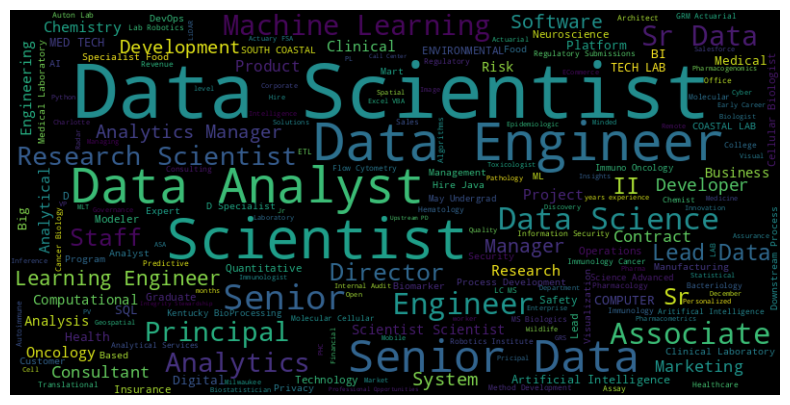

In [25]:
plotdata=" ".join(df['Job Title'])
wc = WordCloud(width=800, height=400, background_color='black').generate(plotdata)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

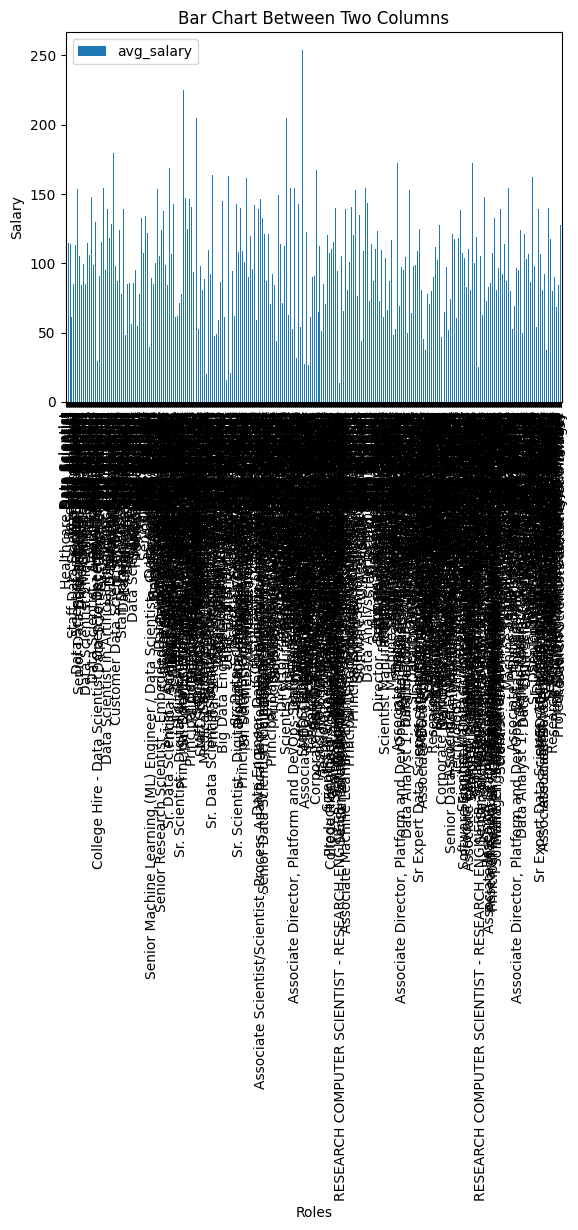

In [27]:
df.plot(x='Job Title', y='avg_salary', kind='bar')
plt.xlabel('Roles')
plt.ylabel('Salary')
plt.title('Bar Chart Between Two Columns')
plt.show()

In [32]:
unique_val=df['Job Title'].unique()
print(unique_val)
print(len(unique_val))

['Data Scientist' 'Healthcare Data Scientist' 'Research Scientist'
 'Staff Data Scientist - Technology' 'Data Analyst' 'Data Engineer I'
 'Scientist I/II, Biology' 'Customer Data Scientist'
 'Data Scientist - Health Data Analytics'
 'Senior Data Scientist / Machine Learning'
 'Data Scientist - Quantitative' 'Digital Health Data Scientist'
 'Associate Data Analyst' 'Clinical Data Scientist'
 'Data Scientist / Machine Learning Expert' 'Web Data Analyst'
 'Senior Data Scientist' 'Data Engineer'
 'Data Scientist - Algorithms & Inference' 'Scientist'
 'Lead Data Scientist' 'Spectral Scientist/Engineer'
 'College Hire - Data Scientist - Open to December 2019 Graduates'
 'Data Scientist, Office of Data Science' 'Data Science Analyst'
 'Senior Risk Data Scientist'
 'Data Scientist in Artificial Intelligence Early Career'
 'Data Scientist - Research' 'R&D Data Analysis Scientist'
 'Analytics Consultant' 'Director, Data Science' 'Data Scientist SR'
 'R&D Sr Data Scientist' 'Customer Data Scienti

In [35]:
pivot_table = df.pivot(index='Job Title', columns='avg_salary', values='avg_salary')

plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title('Average Salary by Job Role')
plt.show()


ValueError: Index contains duplicate entries, cannot reshape

In [37]:
job_roles = df['Job Title'].value_counts()
# Create a bar chart using Plotly Express
fig = px.bar(y=job_roles.values, 
             x=job_roles.index, 
             color = job_roles.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=job_roles.values,
             title= 'Job roles distribution',
             template= 'plotly_dark',
             width=750, height=500)
# Update the layout of the chart to set the axis titles and font size
fig.update_layout(
    xaxis_title="Job Titles",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
# Show the chart
fig.show()

based on rating , creating a sub dataframe to visulise the data 


In [43]:
filtered_df=df[df['Rating']==5]

In [44]:
filtered_df.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,min_salary,max_salary,avg_salary
45,Data Scientist,Employer Provided Salary:$150K-$160K,5.0,BPA Services\n5.0,"Washington, DC",150,160,155.0
138,Data Engineer,Employer Provided Salary:$120K-$145K,5.0,Gridiron IT\n5.0,"Tampa, FL",120,145,132.5
373,Data Scientist,Employer Provided Salary:$150K-$160K,5.0,BPA Services\n5.0,"Washington, DC",150,160,155.0
424,Data Scientist,$75K-$127K (Glassdoor est.),5.0,Royce Geospatial\n5.0,"Springfield, VA",75,127,101.0
693,Senior Data Scientist,Employer Provided Salary:$120K-$140K,5.0,SkySync\n5.0,"Ann Arbor, MI",120,140,130.0


In [45]:
filtered_df.shape

(5, 8)

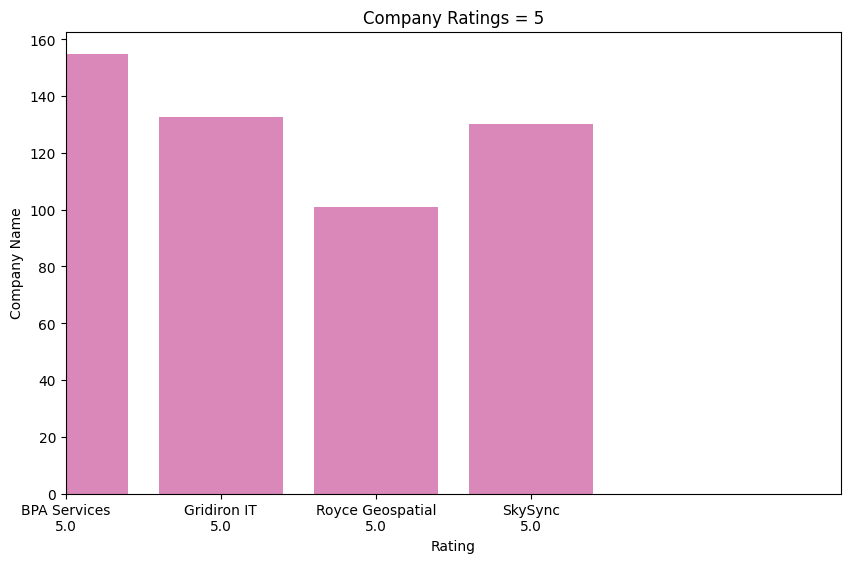

In [47]:
plt.figure(figsize=(10, 6))
plt.bar(filtered_df['Company Name'], filtered_df['avg_salary'], color='#D988B9')
plt.xlabel('Rating')
plt.ylabel('Company Name')
plt.title('Company Ratings = 5')
plt.xlim(0, 5)  # Set an appropriate range for the x-axis
plt.show()

In [49]:
filtered_df2=df[df['Rating']>4]
filtered_df2.shape

(172, 8)

In [50]:
roles=filtered_df2['Job Title'].value_counts()


In [51]:
print(roles)

Job Title
Data Scientist                                      41
Senior Data Scientist                               18
Data Engineer                                       13
Senior Data Engineer                                 6
Data Analyst                                         4
                                                    ..
Data & Analytics Consultant (NYC)                    1
Big Data Engineer - Chicago - Future Opportunity     1
Survey Data Analyst                                  1
Data Management Specialist                           1
Machine Learning Engineer (NLP)                      1
Name: count, Length: 67, dtype: int64


In [52]:
filtered_roles = roles[roles >= 5].index

In [56]:
roles_df = filtered_df2[filtered_df2['Job Title'].isin(filtered_roles)]
roles_df.columns

Index(['Job Title', 'Salary Estimate', 'Rating', 'Company Name', 'Location',
       'min_salary', 'max_salary', 'avg_salary'],
      dtype='object')

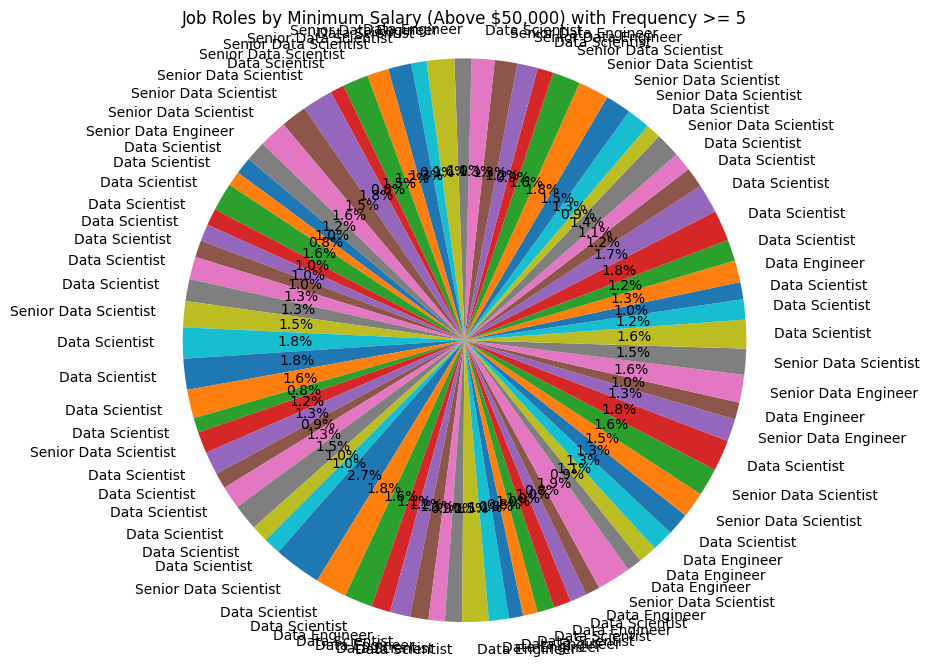

In [60]:
plt.figure(figsize=(8, 8))
plt.pie(roles_df['avg_salary'], labels=roles_df['Job Title'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')

plt.title(f'Job Roles by Minimum Salary (Above $50,000) with Frequency >= 5')
plt.show()

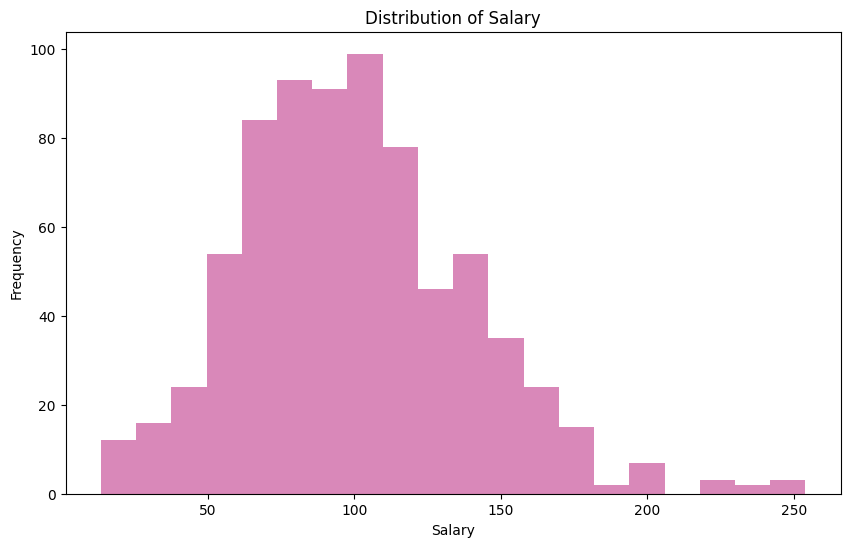

In [71]:
# use pyplot to plot out the distributions of the avg_salary column of df
plt.figure(figsize=(10, 6))
plt.hist(df['avg_salary'], bins=20, color='#D988B9')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salary')
plt.show()

<Axes: >

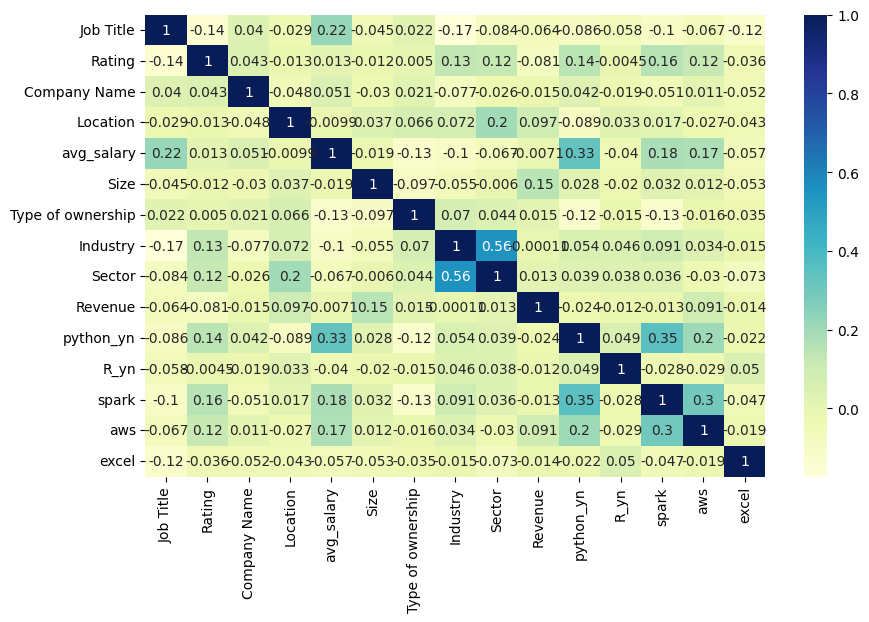

In [73]:
import seaborn as sns
# plot the heatmap of df
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

# ML

In [29]:
df.head()

,Job Title,Rating,Company Name,Location,avg_salary,Size,Type of ownership,Industry,Sector,Revenue,python_yn,R_yn,spark,aws,excel
0,Data Scientist,3.8,Tecolote Research\n3.8,"Albuquerque, NM",72.0,501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),1,0,0,0,1
1,Healthcare Data Scientist,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD",87.5,10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),1,0,0,0,0
2,Data Scientist,4.8,KnowBe4\n4.8,"Clearwater, FL",85.0,501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),1,0,1,0,1
3,Data Scientist,3.8,PNNL\n3.8,"Richland, WA",76.5,1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),1,0,0,0,0
4,Data Scientist,2.9,Affinity Solutions\n2.9,"New York, NY",114.5,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,1,0,0,0,1


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Rating             742 non-null    float64
 2   Company Name       742 non-null    object 
 3   Location           742 non-null    object 
 4   avg_salary         742 non-null    float64
 5   Size               742 non-null    object 
 6   Type of ownership  742 non-null    object 
 7   Industry           742 non-null    object 
 8   Sector             742 non-null    object 
 9   Revenue            742 non-null    object 
 10  python_yn          742 non-null    int64  
 11  R_yn               742 non-null    int64  
 12  spark              742 non-null    int64  
 13  aws                742 non-null    int64  
 14  excel              742 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 87.1+ KB


In [33]:
df.columns

Index(['Job Title', 'Rating', 'Company Name', 'Location', 'avg_salary', 'Size',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'python_yn',
       'R_yn', 'spark', 'aws', 'excel'],
      dtype='object')

In [35]:
columns_to_encode = ['Job Title', 'Company Name', 'Location', 'Size',
       'Type of ownership', 'Industry', 'Sector', 'Revenue']

le = LabelEncoder()
for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])
    print('Label encoding complete.')

Label encoding complete.
Label encoding complete.
Label encoding complete.
Label encoding complete.
Label encoding complete.
Label encoding complete.
Label encoding complete.
Label encoding complete.


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    int32  
 1   Rating             742 non-null    float64
 2   Company Name       742 non-null    int32  
 3   Location           742 non-null    int32  
 4   avg_salary         742 non-null    float64
 5   Size               742 non-null    int32  
 6   Type of ownership  742 non-null    int32  
 7   Industry           742 non-null    int32  
 8   Sector             742 non-null    int32  
 9   Revenue            742 non-null    int32  
 10  python_yn          742 non-null    int64  
 11  R_yn               742 non-null    int64  
 12  spark              742 non-null    int64  
 13  aws                742 non-null    int64  
 14  excel              742 non-null    int64  
dtypes: float64(2), int32(8), int64(5)
memory usage: 63.9 KB


In [40]:
X = df.drop('avg_salary', axis=1)
y = df['avg_salary']

In [41]:
print(X.shape, y.shape)

(742, 14) (742,)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape, X_test.shape)

(593, 14) (149, 14)


In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import sklearn.metrics as metrics

In [53]:
lr = LinearRegression()
lr.fit(X_train, y_train) 
y_pred = lr.predict(X_test)

In [55]:
# y_pred

In [75]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 26.810010909800745
Root Mean Squared Error: 34.443722646452464


In [78]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 29.7013341617969
Root Mean Squared Error: 37.724000832456554


In [79]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 26.75302013422819
Root Mean Squared Error: 35.712874372880634
